#### Importing Standard Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [14]:
df = pd.read_csv('Bank-full.csv')
data = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Name of the Variables and Shape of the Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Observation
1. The Dataset consists of 16 independent variables and 1 dependent variable i.e Target with 45211 rows
2. 7 numerical columns namely age, balance, day, duration, campaign, pdays, previous
3. 10 Categorical subdivided as
   1. Dichotomous Nominal Variables (i.e. with only two categories) are default, housing, loan & Target
   2. Nominal Variables are job, marital, education, contact, month & poutcome

In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### Observations
1. The value of 'duration' variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call. It might lead to leakage in the data and the prediction model will not be realistic. Hence we can drop this column from the dataset.
2. There are negative values in the balance & pdays column. Negative values in the pdays column indicates missing values hence will treat for missing values. Negative value in the balance column seems realistic as it is an average yearly balance.
3. It has 4 Boolean variables: default, housing, loan, Target
4. Around 1% of the customer has credit in default.
5. Around 55% of the customer has housing loan.
6. Around 16% of customers has personal loan.
7. Around 11% of the customer has subcribed a term deposit.

## Exploratory Data Analysis

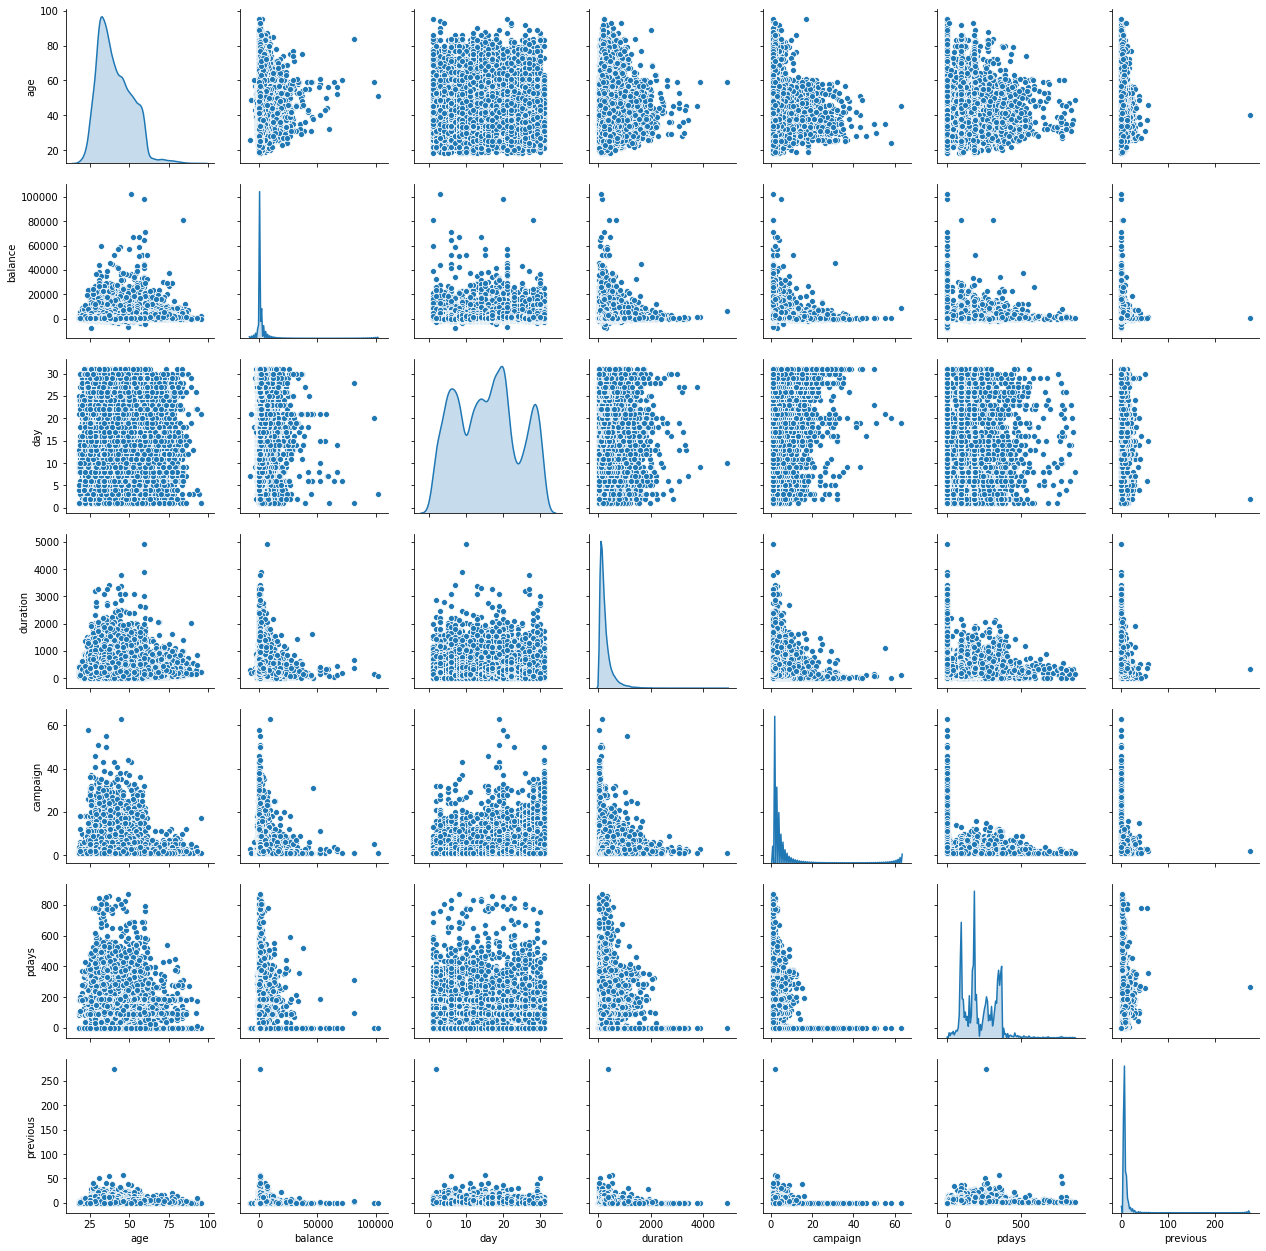

In [18]:
sns.pairplot(df, diag_kind='kde')

##### Observations
1. We can observe that data here is not-symmetric

#### Handling Dichotomous Nominal Variables

In [19]:
df.default.replace(('yes', 'no'), (1, 0), inplace=True)
df.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df.Target.replace(('yes', 'no'), (1, 0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


### Categorical Variables

In [9]:
#Method to print bar plot for the variable
def showBarPlot(df, col):
    plt.figure(figsize=(5,3))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

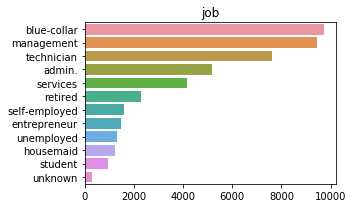

In [10]:
showBarPlot(df, 'job')

##### Observation: The job column has unknown values.

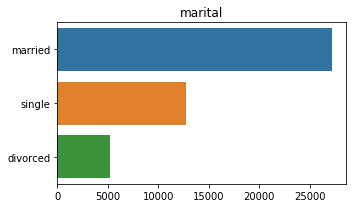

In [221]:
showBarPlot(df, 'marital')

##### Observation: The marital column has no unknown value.

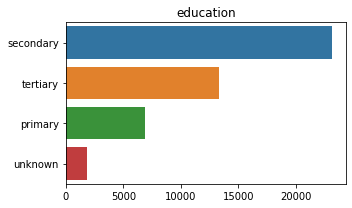

In [222]:
showBarPlot(df, 'education')

##### Observation: The job column has unknown values

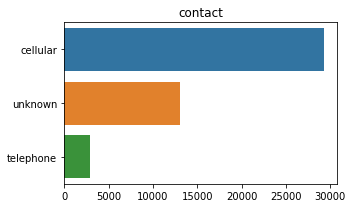

In [223]:
showBarPlot(df, 'contact')

##### Observation: The job column has unknown values. The data is missing and we can't infer the unknown value hence will need to remove it.

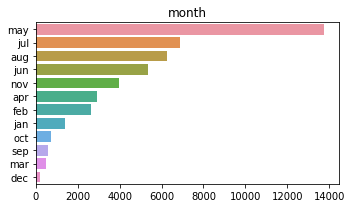

In [224]:
showBarPlot(df, 'month')

##### Observation: The job column has no unknown value

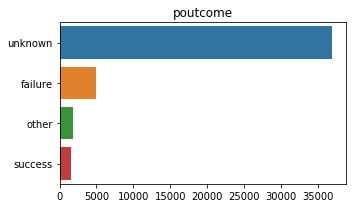

In [225]:
showBarPlot(df, 'poutcome')

##### Observation: The job column has high number of unknown values

#### Handling the Unknown Values / Imputation
To infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Also, if age > 60 then the job will be retired.

The missing values can only be replaced if it makes some real world sense as shown below

In [226]:
df.job[df.age>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [227]:
#Replace unknown job with retired when age > 60
df.loc[(df.age > 60) & (df.job == 'unknown'), 'job'] = 'retired'

In [228]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,796,989,371,130
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


##### Observations
1. Infering education from jobs
From the cross-tabulation, it can be seen that people with management jobs usually have a tertiary. Hence wherever job = management and education = unknown, we can replace education with tertiary. Based on this understanding we can carry out the following replacement to handle unknown values
   1. If job = management and education = unknown then replace education = tertiary. 
   2. If job = services and education = unknown then replace education = secondary.
2. Infering jobs from education
Here we can infer the following
   1. If education = primary and job = unknown then replace job = blue-collar

In [229]:
#Replace unknown based on above inference
df.loc[(df.job == 'management') & (df.education == 'unknown'), 'education'] = 'tertiary'
df.loc[(df.job == 'services') & (df.education == 'unknown'), 'education'] = 'secondary'
df.loc[(df.education == 'primary') & (df.job == 'unknown'), 'job'] = 'blue-collar'

In [230]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3808,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,8043,0
retired,796,989,371,130
self-employed,130,577,833,39
services,345,3607,202,0
student,44,508,223,163


##### Observation: We are able to reduce the number of unknowns and enhance our data set.

Now, the poutcome column indicates the outcome of the previous campaign. Logically, it could be either success or failure or nonexistent. Hence, we can replace other as well as unknown value with nonexistent to handle the unknown values

In [231]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [232]:
df.poutcome = df.poutcome.replace('unknown', 'nonexistent')
df.poutcome = df.poutcome.replace('other', 'nonexistent')
df.poutcome.value_counts()

nonexistent    38799
failure         4901
success         1511
Name: poutcome, dtype: int64

### Numerical Values

In [233]:
#Method to print dist plot for the variable & print skewness
def showDistPlot(df, col):
    plt.figure(figsize=(4,2))
    sns.distplot(df[col])
    plt.tight_layout()
    print(df[col].skew())

0.6848179257252598


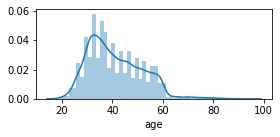

In [234]:
showDistPlot(df,'age')

##### Observations: age column is moderately right skewed. The graph shows presence of outliers too.

8.360308326166326


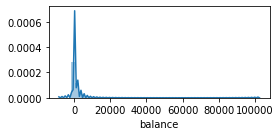

In [235]:
showDistPlot(df,'balance')

##### Observations: balance column is highly right skewed. The graph shows presence of outliers too.

0.09307901402122411


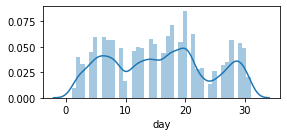

In [236]:
showDistPlot(df,'day')

##### Observations: day column is approximately symmetric. 

4.898650166179674


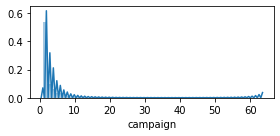

In [237]:
showDistPlot(df,'campaign')

##### Observations: campaign column is highly right skewed. The graph shows presence of outliers too.

2.6157154736563477


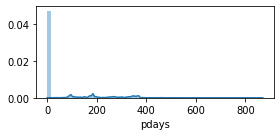

In [238]:
showDistPlot(df,'pdays')

##### Observations: pdays column is highly right skewed. The graph shows presence of outliers too.

41.84645447266292


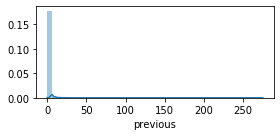

In [239]:
showDistPlot(df,'previous')

##### Observations: previous column is moderately right skewed. The graph shows presence of outliers too.

#### Let see the summary of the data to further understand the numerical variables.

In [240]:
numerical_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df[numerical_variables].describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


##### Observations:
##### Missing Values:
The missing value for pdays column is encoded with -1 instead of 999 as mentioned in the question. From the above table, it is clear that 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

##### Outliers:
Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that all columns except day have outliers. In other words the columns age, balance, campaign, pdays & previous have outliers.

But we also see that the value of these outliers age, campaign & balance are not so unrealistic. Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. Therefore, we will treat outliers of pdays & previous columns only.

#### Outliers Treatment

pdays & previous columns of dataset will be treated

In [241]:
from scipy import stats
#pdays
df['pdays_zscore'] = np.abs(stats.zscore(df.pdays))
df = df[df['pdays_zscore'] < 3]
df.drop('pdays_zscore', axis=1, inplace=True)

#previous
df['previous_zscore'] = np.abs(stats.zscore(df.previous))
df = df[df['previous_zscore'] < 3]
df.drop('previous_zscore', axis=1, inplace=True)

In [242]:
df.shape

(42992, 17)

#### MIssing Value Treatment
Let's examine the missing values i.e. -1 in pdays column. Filtered out missing values encoded with an out-of-range value when plotting the histogram of values in order to properly understand the distribution of the known values.

2.816575270772891
0.13352443069021955


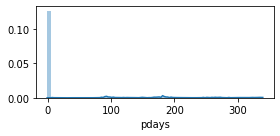

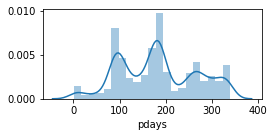

In [243]:
showDistPlot(df,'pdays')
showDistPlot(df.loc[df.pdays != -1],'pdays')

As we can see from the above graph, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: pdays_missing, pmonths_less_4, pmonths_bet_4_8, and pmonths_greater_8.

In [244]:
#Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pmonths_less_4'] = 0
df['pmonths_bet_4_8'] = 0
df['pmonths_greater_8'] = 0

df['pdays_missing'][df.pdays == -1] = 1
df['pmonths'] = round(df.pdays/30)

df['pmonths_less_4'][(df['pmonths'] > 0) & (df['pmonths'] <= 4)] = 1
df['pmonths_greater_8'][(df['pmonths'] > 8)] = 1
df['pmonths_bet_4_8'][(df['pmonths'] > 4) & (df['pmonths'] <= 8)]= 1

df.drop('pdays', axis=1, inplace=True);
df.drop('pmonths', axis=1, inplace=True)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target,pdays_missing,pmonths_less_4,pmonths_bet_4_8,pmonths_greater_8
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,nonexistent,0,1,0,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,nonexistent,0,1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,nonexistent,0,1,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,nonexistent,0,1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,nonexistent,0,1,0,0,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,0,nonexistent,0,1,0,0,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,0,nonexistent,0,1,0,0,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,0,nonexistent,0,1,0,0,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,0,nonexistent,0,1,0,0,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,0,nonexistent,0,1,0,0,0


#### Target Column Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF3A86A608>]],
      dtype=object)

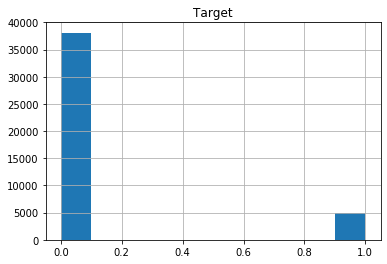

In [245]:
df.hist(column='Target')

##### Observation
1. Target is a Boolean variable.
2. Around 11% customer has subcribed a term deposit.

#### Data Distribution of Target

1. Categorical Variable vs Target Variable

In [246]:
def BarPlotWrtTarget (col):
    ct = pd.crosstab(df[col], df.Target)
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar')

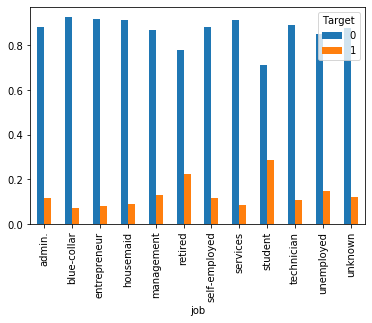

In [247]:
#Job Variable
BarPlotWrtTarget('job')

##### Observation: Students & Retired customers have a higher probability of subcribing a term deposit.

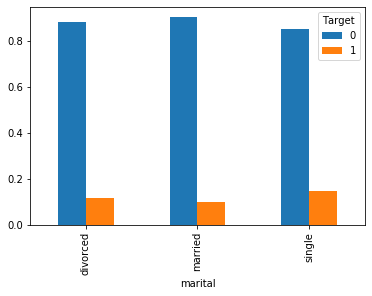

In [248]:
#Marital Variable
BarPlotWrtTarget('marital')

##### Observation : Marital doesn't have any impact on Target

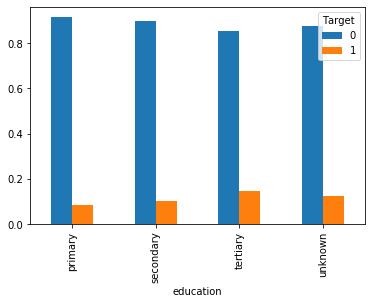

In [249]:
#Education Variable
BarPlotWrtTarget('education')

##### Observation : education doesn't have any impact on Target

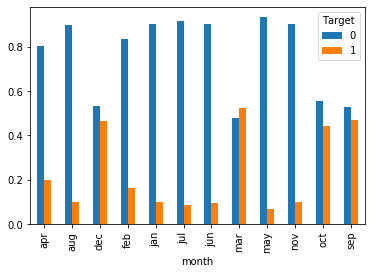

In [250]:
#Month Variable
BarPlotWrtTarget('month')

##### Observation : Month mar, sep, oct & dec has higher chances of subcription

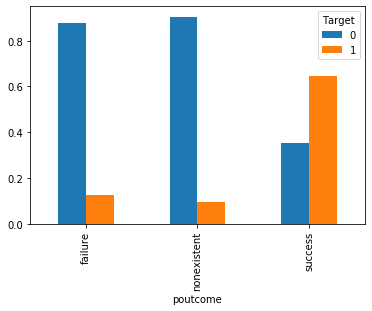

In [251]:
#poutcome Variable
BarPlotWrtTarget('poutcome')

##### Observation : Successful outcome of the previous campaign has an impact on Target variable

2. Boolean Independent Variable vs Target Variable

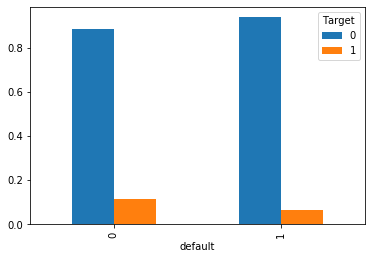

In [252]:
#Default
BarPlotWrtTarget('default')

##### Observation : default column does not seem to affect the Target Variable.

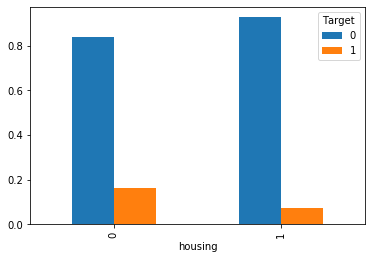

In [253]:
#Housing
BarPlotWrtTarget('housing')

##### Observation : Customers not having housing loan are more likely to opt for term deposits

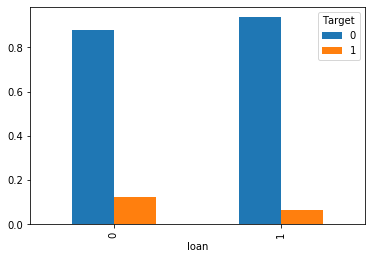

In [254]:
#Loan
BarPlotWrtTarget('loan')

##### Observation : Customer not having personal loan are more likely to opt for term deposits

3. Numerical Independent Variable vs Target Variable

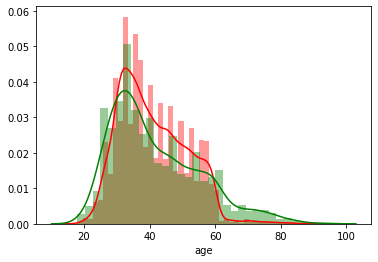

In [255]:
#Age
sns.distplot(df[df.Target == 0]['age'], color = 'r')
sns.distplot(df[df.Target == 1]['age'], color = 'g')

##### Observation: Age does not affect the chances of opting for term deposits

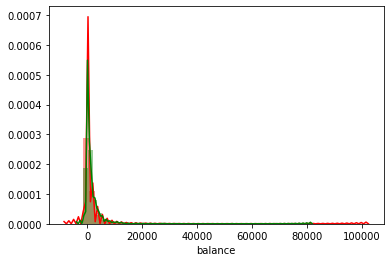

In [256]:
#Balance
sns.distplot(df[df.Target == 0]['balance'], color = 'r')
sns.distplot(df[df.Target == 1]['balance'], color = 'g')

##### Observation: Customer avg annual balance does not majorly affect the chances of opting for term deposits

#### Handling Month Column
We will be updated the month name with the corresponding number i.e. Jan=1, Feb=2 and so on. There are primarily 2 reasons
1. The month column has an order in itself i.e. 1 to 12. Just by looking at the number we will be able to easily understand which month we are referring to in the data.
2. Applying One Hot Encoding to month column will result in 11 extra columns which will impact the computing time of various model. 

In [257]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                 (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

#### One Hot Encoding for Categorical variables

In [258]:
df_with_dummies=pd.get_dummies(df)

In [259]:
df_with_dummies.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'previous', 'Target', 'pdays_missing',
       'pmonths_less_4', 'pmonths_bet_4_8', 'pmonths_greater_8', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

Drop one of the dummy variables as for $n$ categories we only need $n$-1 dummy variables.

In [260]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

features_dropped = ['pmonths_less_4','job_unknown','education_unknown','contact_unknown']
df = dropfeature(df_with_dummies, features_dropped)

In [261]:
# Drop columns not required
df.drop('duration', axis=1, inplace=True)

#### Correlation Comparison

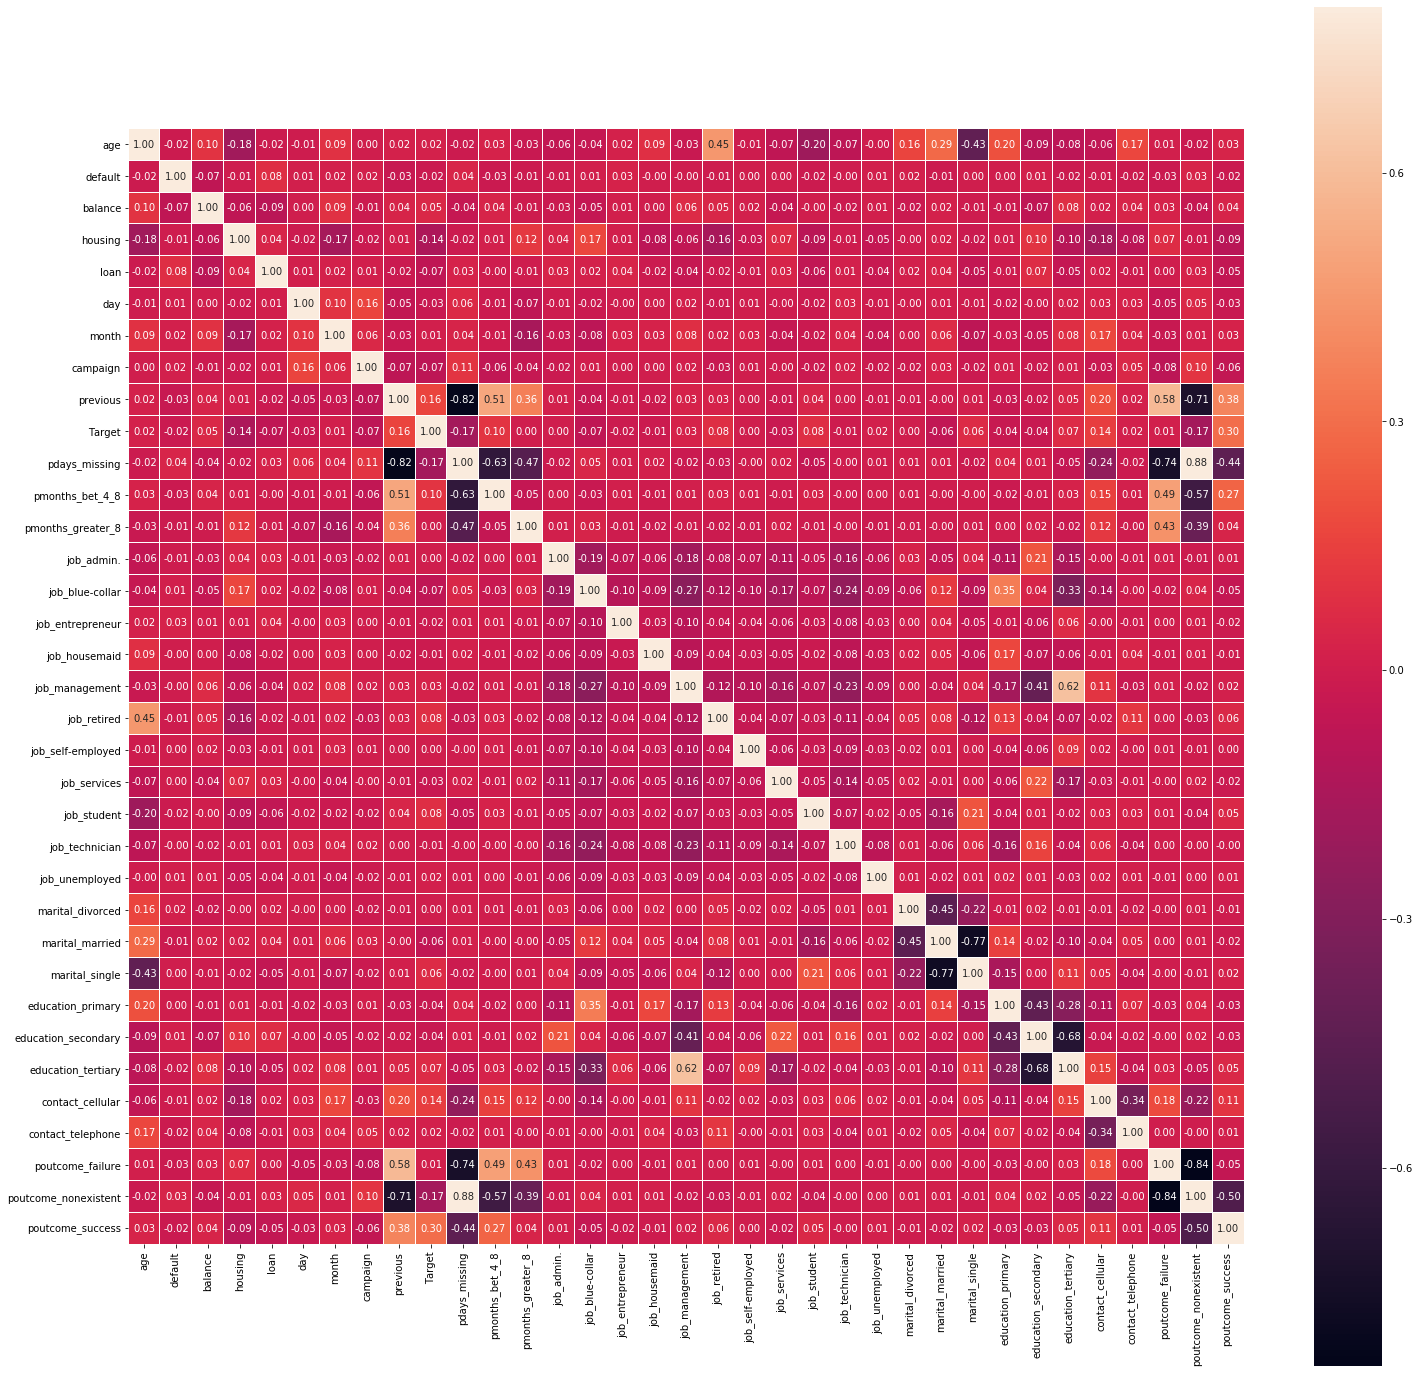

In [262]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), square=True, annot=True, linecolor='white', vmax=.8, fmt='.2f',linewidths=0.01)

#Logic to manage the known issue with Matplotlib version 3.1.11 w.r.t. Heat Map
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Observation
1. The Heat Map shows that the Target Variable has correlation with housing, pdays_missing, previous, contact_cellular, month_mar, month_sep, month_oct, poutcome_nonexistant and poutcome_success. We expect to see these independent variables as significant while building the models.

In [263]:
df.Target.value_counts(normalize=True)

0    0.886374
1    0.113626
Name: Target, dtype: float64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42992 entries, 0 to 45209
Data columns (total 35 columns):
age                     42992 non-null int64
default                 42992 non-null int64
balance                 42992 non-null int64
housing                 42992 non-null int64
loan                    42992 non-null int64
day                     42992 non-null int64
month                   42992 non-null int64
campaign                42992 non-null int64
previous                42992 non-null int64
Target                  42992 non-null int64
pdays_missing           42992 non-null int64
pmonths_bet_4_8         42992 non-null int64
pmonths_greater_8       42992 non-null int64
job_admin.              42992 non-null uint8
job_blue-collar         42992 non-null uint8
job_entrepreneur        42992 non-null uint8
job_housemaid           42992 non-null uint8
job_management          42992 non-null uint8
job_retired             42992 non-null uint8
job_self-employed       42992 non-nu

## Model Building

In [265]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, recall_score

#### Creating Training & Test Set (70:30) + Standardizing Data

In [266]:
scaler = preprocessing.StandardScaler()

#Set of Independent Variables
X=df.drop('Target', axis=1)
#Dependent Variable
y=df['Target']

Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.30, stratify=y, random_state=1501)
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

In [267]:
Xtrain.shape

(30094, 34)

In [268]:
Xtest.shape

(12898, 34)

### Common Methods for all Models

In [269]:
#Function to execute the model passed as an argument
def ExecuteModel(model):
    m=model
    fit = m.fit(Xtrain, ytrain)
    print(fit)
    train = m.score(Xtrain, ytrain)
    test = m.score(Xtest, ytest)
    pred = m.predict(Xtest)
    print("Training Data Score: {0}".format(train))
    print("Testing Data Score : {0}".format(test))
    print("Classification Report: \n {0}".format(classification_report(ytest, pred)))
    return m, pred

#Function to plot the ROC Curve of the model
def PlotROC(model, label):
    m=model
    prob = m.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, prob[:,1])
    roc_auc = auc(fpr, tpr)
    #thresholds will gives all the threshold values

    plt.figure()
    plt.plot(fpr, tpr, _, label= label + ' (area = %0.2f)' %roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

#Function to print the Final Results of the model
def PrintFinalResults(model, pred):
    acc_scr = accuracy_score(ytest, pred)
    
    x = PrettyTable()
    x.field_names = ["Metrics", "Results"]
    x.add_row(["Classification Report", classification_report(ytest, pred)])    
    x.add_row(["Accuracy Score", acc_scr])
    x.add_row(["",""])
    x.add_row(["Confusion Matrix", confusion_matrix(ytest, pred)])
    x.add_row(["",""])
    x.add_row(["Training Data Score", model.score(Xtrain, ytrain)])
    x.add_row(["",""])
    x.add_row(["Testing Data Score", model.score(Xtest, ytest)])
    print(x)
    return acc_scr

#### Hyper Parameter Tuning Functions

In [270]:
def LogisticRegressionTuneHyperParams(lr):
    # Hyper Parameter
    # Create regularization penalty space
    penalty = ['l1', 'l2']
    # Create regularization hyperparameter space
    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    # Create hyperparameter options
    params = dict(C=C, penalty=penalty)
    gs = GridSearchCV(lr, params, cv=5, n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    lr_bestAcc = gs.best_score_
    lr_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    C = lr_bestParam['C']
    penalty = lr_bestParam['penalty']
    lr = LogisticRegression(C=C, penalty= penalty)
    lr.fit(Xtrain, ytrain)
    lr_ypred = lr.predict(Xtest)
    print("Best Accuracy after Tuning: {0}".format(lr_bestAcc))
    print("Best Parameter after Hyper Tuning: {0}".format(lr_bestParam))
    return lr, lr_ypred

def KNNTuneHyperParams(knn):
    knn = KNeighborsClassifier()
    param = dict(n_neighbors = list(range(9,15,2)))
    gs = GridSearchCV(knn, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    knn_bestScore = gs.best_score_
    knn_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    k = knn_bestParam['n_neighbors']
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    knn_ypred = knn.predict(Xtest)
    print("Best Accuracy after Tuning: {0}".format(knn_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(knn_bestParam))
    return knn, knn_ypred
   
def SVMTuneHyperParams(svc):
    svc = SVC()
    Cs = [0.1, 1, 10]
    gammas = [0.01, 0.1, 1]
    kernel = ['linear', 'rbf', 'poly']
    param = dict(kernel = kernel, C = Cs, gamma = gammas)
    gs = GridSearchCV(svc, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    svc_bestScore = gs.best_score_
    svc_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    k = svc_bestParam['kernel']
    C = svc_bestParam['C']
    g = svc_bestParam['gamma']
    svc = SVC(kernel = k, C=C, gamma =g, probability=True)
    svc.fit(Xtrain, ytrain)
    svc_ypred = svc.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(svc_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(svc_bestParam))
    return svc, svc_ypred

#### Import Libraries

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [272]:
lr, lr_ypred = ExecuteModel(LogisticRegression())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Training Data Score: 0.8957931813650561
Testing Data Score : 0.89510001550628
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11432
           1       0.67      0.15      0.25      1466

    accuracy                           0.90     12898
   macro avg       0.79      0.57      0.60     12898
weighted avg       0.87      0.90      0.86     12898



#### ROC Curve

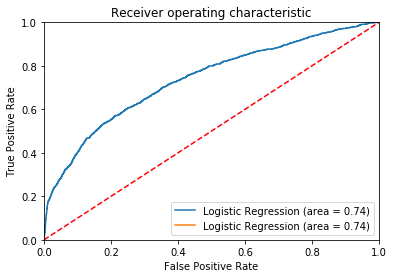

In [273]:
lr_roc_auc = PlotROC(lr, 'Logistic Regression')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [274]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
lr, lr_ypred = LogisticRegressionTuneHyperParams(lr)

Best Accuracy after Tuning: 0.8959260982255599
Best Parameter after Hyper Tuning: {'C': 0.1, 'penalty': 'l1'}


#### Final Results of Logistic Regression

In [275]:
lr_acc_scr = PrintFinalResults(lr, lr_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.67      0.15      0.25      1466 |
|                       |                                                       |
|                       |     accuracy                           0.90     12898 |
|                       |    macro avg       0.79      0.57      0.60     12898 |
|                       | weighted avg       0.88      0.90      0.86     12898 |
|                       |                                                       |
|     Accuracy S

##### Observations
1. The model has scored around 89% accuracy in both the Training as well as Test Data
2. The confusion matrix

Since around 90% of data is for Non-Buyer of Term Deposit (TD), we have

1. Positive (P) = Non buyer of TD
2. Negative (N) = Buyer of TD
3. True Positives (TP): We correctly predicted that customer is non buyer of TD
4. True Negatives (TN): We correctly predicted that customer is buyer of TD
5. False Positives (FP): We incorrectly predicted that a non buyer is a buyer of TD ("Type I error")
6. False Negatives (FN): We incorrectly predicted that a buyer is a non buyer of TD ("Type II error")

In our case, the Type II error is more significant since we are interested in the customers who had actually bought TD, but our model predicted them to be a non-buyer. Hence, the model with lesser number of FN counts will be more wiser.

NOTE: The value of TP, TN, FP, & FN will change every time a different split of data is created

### KNN Algorithm

In [276]:
# After checking multiple values of K, the value 11 seems to give the best accuracy (Can double check by Hyper Param Tuning)
knn, knn_ypred = ExecuteModel(KNeighborsClassifier(n_neighbors=11, n_jobs = -1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')
Training Data Score: 0.8990164152322722
Testing Data Score : 0.8926190106993332
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11432
           1       0.59      0.18      0.28      1466

    accuracy                           0.89     12898
   macro avg       0.75      0.58      0.61     12898
weighted avg       0.87      0.89      0.87     12898



#### ROC Curve

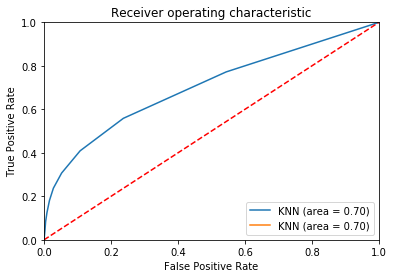

In [277]:
knn_roc_auc = PlotROC(knn, 'KNN')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [278]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
# knn, knn_ypred = KNNTuneHyperParams(knn)

#### Final Results of KNN

In [279]:
knn_acc_scr = PrintFinalResults(knn, knn_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.98      0.94     11432 |
|                       |            1       0.59      0.18      0.28      1466 |
|                       |                                                       |
|                       |     accuracy                           0.89     12898 |
|                       |    macro avg       0.75      0.58      0.61     12898 |
|                       | weighted avg       0.87      0.89      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Naive Bayes

In [280]:
nb, nb_ypred = ExecuteModel(GaussianNB())

GaussianNB(priors=None, var_smoothing=1e-09)
Training Data Score: 0.8000930418023526
Testing Data Score : 0.7990386106373081
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     11432
           1       0.25      0.39      0.31      1466

    accuracy                           0.80     12898
   macro avg       0.58      0.62      0.60     12898
weighted avg       0.84      0.80      0.82     12898



##### Observation
In our case, all the three metric are around 0.9 when we need to find out a non buyer of TD i.e. 0. But, it is not so good in finding out a buyer of TD. This can be also because 90 % of the data for non buyer of TD.

#### ROC Curve

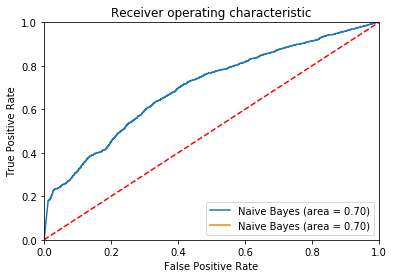

In [281]:
nb_roc_auc = PlotROC(nb, 'Naive Bayes')

#### Final Results for Naive Bayes

In [282]:
nb_acc_scr = PrintFinalResults(nb, nb_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.92      0.85      0.88     11432 |
|                       |            1       0.25      0.39      0.31      1466 |
|                       |                                                       |
|                       |     accuracy                           0.80     12898 |
|                       |    macro avg       0.58      0.62      0.60     12898 |
|                       | weighted avg       0.84      0.80      0.82     12898 |
|                       |                                                       |
|     Accuracy S

##### Observations
1. The model has scored around 82% accuracy in both the Training as well as Test Data
2. The confusion matrix details are already explained in the Logistic Regression section. The same applies here too.

The individual value of precision and recall can be calculated using the confusion matric by the formula
1. Precision = TP/TP+FP
2. Recall = TP/TP+FN

The classification report shows the corresponding value of Precision & Recall for all the 4 combinations.

### Support Vector Machine

In [283]:
svc, svc_ypred = ExecuteModel(SVC(kernel='linear', probability=True))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Training Data Score: 0.8950289094171595
Testing Data Score : 0.8960303923088851
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11432
           1       0.66      0.18      0.28      1466

    accuracy                           0.90     12898
   macro avg       0.78      0.58      0.61     12898
weighted avg       0.88      0.90      0.87     12898



#### ROC

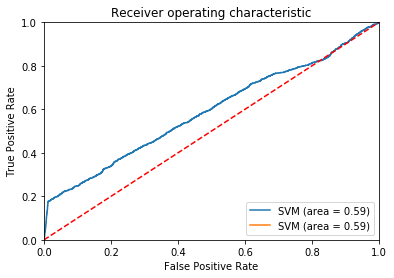

In [284]:
svc_roc_auc = PlotROC(svc, 'SVM')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [285]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
# svc, svc_ypred = SVCTuneHyperParams(svc)

#### Final Results of SVC

In [286]:
svc_acc_scr = PrintFinalResults(svc, svc_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.66      0.18      0.28      1466 |
|                       |                                                       |
|                       |     accuracy                           0.90     12898 |
|                       |    macro avg       0.78      0.58      0.61     12898 |
|                       | weighted avg       0.88      0.90      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Performance Evaluation of all Classification Algorithms

In [287]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithm", "Accuracy Score", "ROC AUC"]
x.add_row(["Logistic Regression", lr_acc_scr, lr_roc_auc])
x.add_row(["K-Nearest Neighbors", knn_acc_scr, knn_roc_auc])
x.add_row(["Naive Bayes", nb_acc_scr, nb_roc_auc])
x.add_row(["Suport Vector Machine", svc_acc_scr, svc_roc_auc])

print(x)

+-----------------------+--------------------+--------------------+
|       Algorithm       |   Accuracy Score   |      ROC AUC       |
+-----------------------+--------------------+--------------------+
|  Logistic Regression  | 0.8952550783067142 | 0.7372027562945305 |
|  K-Nearest Neighbors  | 0.8926190106993332 | 0.7016666018270916 |
|      Naive Bayes      | 0.7990386106373081 | 0.6984320716745414 |
| Suport Vector Machine | 0.8960303923088851 | 0.5902919523188064 |
+-----------------------+--------------------+--------------------+


##### Observations
1. Logistic Regression, KNN & SVM have performed equally well among all the algorithms. 
2. SVM has the highest accuracy of around 89.6%
3. NB has the lowest accuracy of around 80%

### Ensemble Techniques
#### Import Libraries

In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

#### Hyper Parameter Tuning Functions

In [289]:
def DecisionTreesTuneHyperParams(dt):
    dt = DecisionTreeClassifier()
    minSplit = [2, 3, 5]
    minLeaf = [1, 2, 4]
    criterion = ['gini', 'entropy']
    maxDepth = [None, 3, 5]
    param = dict(criterion = criterion, max_depth = maxDepth, min_samples_split = minSplit, min_samples_leaf = minLeaf)
    gs = GridSearchCV(dt, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    dt_bestScore = gs.best_score_
    dt_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    c = dt_bestParam['criterion']
    md = dt_bestParam['max_depth']
    mss = dt_bestParam['min_samples_split']
    msl = dt_bestParam['min_samples_leaf']
    dt = DecisionTreeClassifier(criterion = c, max_depth = md, min_samples_split = mss, min_samples_leaf = msl)
    dt.fit(Xtrain, ytrain)
    dt_ypred = dt.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(dt_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(dt_bestParam))    
    return dt, dt_ypred

def RandomForestTuneHyperParams(rf):
    rf = RandomForestClassifier()
    est = [50, 100, 200]
    minLeaf = [1, 5, 10]
    minSplit = [5, 10, 12]
    maxDepth = [None, 5, 15]
    param = dict(n_estimators = est, max_depth = maxDepth, min_samples_split = minSplit, min_samples_leaf = minLeaf)
    rs = RandomizedSearchCV(estimator = rf, param_distributions = param, cv=3, verbose=2, n_jobs = -1)
    rs.fit(Xtrain, ytrain)

    rf_bestScore = rs.best_score_
    rf_bestParam = rs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = rf_bestParam['n_estimators']
    md = rf_bestParam['max_depth']
    mss = rf_bestParam['min_samples_split']
    msl = rf_bestParam['min_samples_leaf']
    rf = RandomForestClassifier(n_estimators = e, max_depth = md, min_samples_split = mss, min_samples_leaf = msl)
    rf.fit(Xtrain, ytrain)
    rf_ypred = rf.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(rf_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(rf_bestParam))    
    return rf, rf_ypred

def BaggingTuneHyperParams(bg):
    bg = BaggingClassifier()
    est = [5, 15, 20]
    maxSam = [0.1, 0.7, 1.0]
    param = dict(n_estimators = est, max_samples = maxSam)
    gs = GridSearchCV(bg, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    bg_bestScore = gs.best_score_
    bg_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = bg_bestParam['n_estimators']
    ms = bg_bestParam['max_samples']
    bg = BaggingClassifier(n_estimators = e, max_samples = ms, n_jobs = -1)
    bg.fit(Xtrain, ytrain)
    bg_ypred = bg.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(bg_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(bg_bestParam))    
    return bg, bg_ypred

def AdaBoostingTuneHyperParams(ab):
    ab = AdaBoostClassifier()
    est = [5, 10, 20]
    rate = [0.1, 0.5, 1.0]
    param = dict(n_estimators = est, learning_rate = rate)
    gs = GridSearchCV(ab, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    ab_bestScore = gs.best_score_
    ab_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = ab_bestParam['n_estimators']
    lr = ab_bestParam['learning_rate']
    ab = AdaBoostClassifier(n_estimators = e, learning_rate = lr)
    ab.fit(Xtrain, ytrain)
    ab_ypred = ab.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(ab_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(ab_bestParam))    
    return ab, ab_ypred

def GradientBoostingTuneHyperParams(gb):
    gb = GradientBoostingClassifier()
    est = [5, 10]
    rate = [0.1, 1.0]
    minLeaf = [5, 10]
    minSplit = [5, 12]
    maxDepth = [None, 10]
    param = dict(n_estimators = est, learning_rate = rate, max_depth = maxDepth, min_samples_split = minSplit, min_samples_leaf = minLeaf)
    gs = GridSearchCV(gb, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtrain, ytrain)

    gb_bestScore = gs.best_score_
    gb_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    e = gb_bestParam['n_estimators']
    lr = gb_bestParam['learning_rate']
    md = gb_bestParam['max_depth']
    mss = gb_bestParam['min_samples_split']
    msl = gb_bestParam['min_samples_leaf']
    gb = GradientBoostingClassifier(n_estimators = e, learning_rate = lr, max_depth = md, min_samples_split = mss, min_samples_leaf = msl)
    gb.fit(Xtrain, ytrain)
    gb_ypred = gb.predict(Xtest)

    print("Best Accuracy after Tuning: {0}".format(gb_bestScore))
    print("Best Parameter after Hyper Tuning: {0}".format(gb_bestParam))    
    return gb, gb_ypred


### Decision Trees

In [290]:
dt, dt_ypred = ExecuteModel(DecisionTreeClassifier())
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X.columns))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Training Data Score: 1.0
Testing Data Score : 0.8267948519150256
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11432
           1       0.27      0.32      0.29      1466

    accuracy                           0.83     12898
   macro avg       0.59      0.61      0.60     12898
weighted avg       0.84      0.83      0.83     12898

                           Imp
age                   0.150362
default               0.001988
balance               0.218527
housing               0.021577
loan                  0

#### ROC Curve

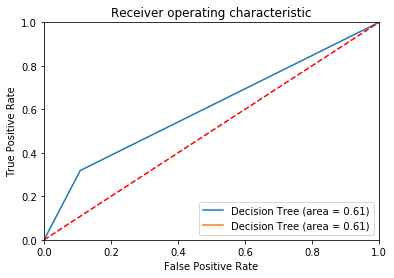

In [291]:
dt_roc_auc = PlotROC(dt, 'Decision Tree')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [292]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
dt, dt_ypred = DecisionTreesTuneHyperParams(dt)

Best Accuracy after Tuning: 0.8954276599986708
Best Parameter after Hyper Tuning: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Final Results of Decision Trees

In [293]:
dt_acc_scr = PrintFinalResults(dt, dt_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.68      0.14      0.23      1466 |
|                       |                                                       |
|                       |     accuracy                           0.89     12898 |
|                       |    macro avg       0.79      0.56      0.59     12898 |
|                       | weighted avg       0.88      0.89      0.86     12898 |
|                       |                                                       |
|     Accuracy S

### Random Forest

In [294]:
rf, rf_ypred = ExecuteModel(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Data Score: 0.9854123745597129
Testing Data Score : 0.889750348891301
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11432
           1       0.55      0.17      0.26      1466

    accuracy                           0.89     12898
   macro avg       0.73      0.58      0.60     12898
weighted avg       0.86      0.89      0.86     12898



#### ROC Curve

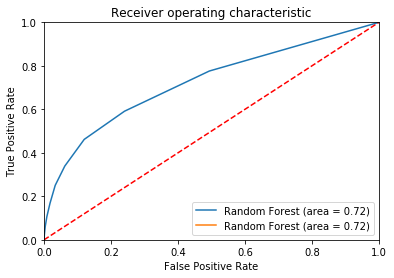

In [295]:
rf_roc_auc = PlotROC(rf, 'Random Forest')

#### Hyper Parameter Tuning using RandomizedSearchCV & Build Model with Optimal Value

In [296]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
rf, rf_ypred = RandomForestTuneHyperParams(rf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.1s finished


Best Accuracy after Tuning: 0.895859639795308
Best Parameter after Hyper Tuning: {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_depth': 15}


#### Final Results of Random Forest

In [297]:
rf_acc_scr = PrintFinalResults(rf, rf_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.70      0.16      0.25      1466 |
|                       |                                                       |
|                       |     accuracy                           0.90     12898 |
|                       |    macro avg       0.80      0.57      0.60     12898 |
|                       | weighted avg       0.88      0.90      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Bagging

In [298]:
bg, bg_ypred = ExecuteModel(BaggingClassifier())

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Training Data Score: 0.9851465408387053
Testing Data Score : 0.8873468754845713
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11432
           1       0.51      0.22      0.30      1466

    accuracy                           0.89     12898
   macro avg       0.71      0.60      0.62     12898
weighted avg       0.86      0.89      0.87     12898



#### ROC

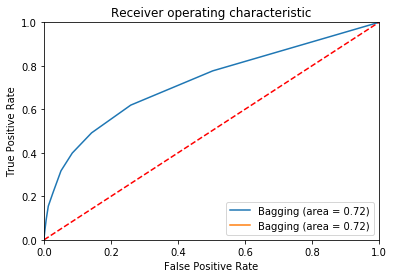

In [299]:
bg_roc_auc = PlotROC(bg, 'Bagging')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [300]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
bg, bg_ypred = BaggingTuneHyperParams(bg)

Best Accuracy after Tuning: 0.8922708845617067
Best Parameter after Hyper Tuning: {'max_samples': 0.1, 'n_estimators': 20}


#### Final Results of Bagging

In [301]:
bg_acc_scr = PrintFinalResults(bg, bg_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.62      0.18      0.28      1466 |
|                       |                                                       |
|                       |     accuracy                           0.89     12898 |
|                       |    macro avg       0.76      0.58      0.61     12898 |
|                       | weighted avg       0.87      0.89      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Ada Boosting

In [302]:
ab, ab_ypred = ExecuteModel(AdaBoostClassifier())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Training Data Score: 0.8947298464810262
Testing Data Score : 0.8931617305008528
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11432
           1       0.62      0.16      0.25      1466

    accuracy                           0.89     12898
   macro avg       0.76      0.57      0.60     12898
weighted avg       0.87      0.89      0.86     12898



#### ROC

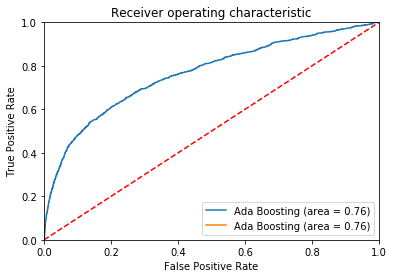

In [303]:
ab_roc_auc = PlotROC(ab, 'Ada Boosting')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [304]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook.
ab, ab_ypred = AdaBoostingTuneHyperParams(ab)

Best Accuracy after Tuning: 0.8950289094171595
Best Parameter after Hyper Tuning: {'learning_rate': 0.1, 'n_estimators': 5}


#### Final Results of Ada Boosting

In [305]:
ab_acc_scr = PrintFinalResults(ab, ab_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.66      0.18      0.28      1466 |
|                       |                                                       |
|                       |     accuracy                           0.90     12898 |
|                       |    macro avg       0.78      0.58      0.61     12898 |
|                       | weighted avg       0.88      0.90      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Gradient Boosting

In [306]:
gb, gb_ypred = ExecuteModel(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training Data Score: 0.8998471456104207
Testing Data Score : 0.8954101411071484
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11432
           1       0.64      0.18      0.29      1466

    accuracy                           0.90     12898
 

#### ROC

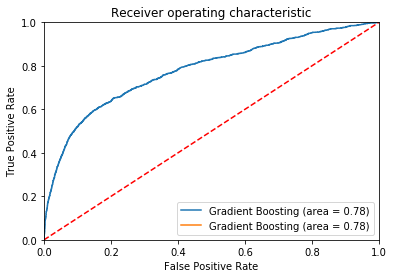

In [307]:
gb_roc_auc = PlotROC(gb, 'Gradient Boosting')

#### Hyper Parameter Tuning using GridSearchCV & Build Model with Optimal Value

In [308]:
# The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
# Comment this code if you need to save computation time of the notebook. 
gb, gb_ypred = GradientBoostingTuneHyperParams(gb)

Best Accuracy after Tuning: 0.892071509270951
Best Parameter after Hyper Tuning: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 10}


#### Final Results of Gradient Boosting

In [309]:
gb_acc_scr = PrintFinalResults(gb, gb_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.67      0.12      0.20      1466 |
|                       |                                                       |
|                       |     accuracy                           0.89     12898 |
|                       |    macro avg       0.78      0.55      0.57     12898 |
|                       | weighted avg       0.87      0.89      0.86     12898 |
|                       |                                                       |
|     Accuracy S

### XGBoost - Extreme Gradient Boosting

In [310]:
xg, xg_ypred = ExecuteModel(XGBClassifier())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training Data Score: 0.8990164152322722
Testing Data Score : 0.8964180493099705
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11432
           1       0.67      0.18      0.28      1466

    accuracy                           0.90     12898
   macro avg       0.78      0.58      0.61     12898
weighted avg       0.88      0.90      0.87     12898



#### ROC

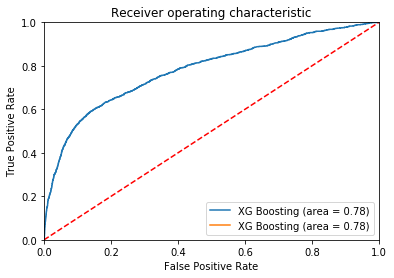

In [311]:
xg_roc_auc = PlotROC(xg, 'XG Boosting')

#### Final Results of Extreme Gradient Boosting

In [312]:
xg_acc_scr = PrintFinalResults(xg, xg_ypred)

+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |            0       0.90      0.99      0.94     11432 |
|                       |            1       0.67      0.18      0.28      1466 |
|                       |                                                       |
|                       |     accuracy                           0.90     12898 |
|                       |    macro avg       0.78      0.58      0.61     12898 |
|                       | weighted avg       0.88      0.90      0.87     12898 |
|                       |                                                       |
|     Accuracy S

### Evaluate Performance of all Models

In [313]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithm", "Accuracy Score", "ROC AUC"]
x.add_row(["Logistic Regression", lr_acc_scr, lr_roc_auc])
x.add_row(["K-Nearest Neighbors", knn_acc_scr, knn_roc_auc])
x.add_row(["Naive Bayes", nb_acc_scr, nb_roc_auc])
x.add_row(["Suport Vector Machine", svc_acc_scr, svc_roc_auc])
x.add_row(["Decision Trees", dt_acc_scr, dt_roc_auc])
x.add_row(["Random Forest", rf_acc_scr, rf_roc_auc])
x.add_row(["Bagging", bg_acc_scr, bg_roc_auc])
x.add_row(["Ada Boosting", ab_acc_scr, ab_roc_auc])
x.add_row(["Gradient Boosting", gb_acc_scr, gb_roc_auc])
x.add_row(["XG Boosting", xg_acc_scr, xg_roc_auc])

print(x)

+-----------------------+--------------------+--------------------+
|       Algorithm       |   Accuracy Score   |      ROC AUC       |
+-----------------------+--------------------+--------------------+
|  Logistic Regression  | 0.8952550783067142 | 0.7372027562945305 |
|  K-Nearest Neighbors  | 0.8926190106993332 | 0.7016666018270916 |
|      Naive Bayes      | 0.7990386106373081 | 0.6984320716745414 |
| Suport Vector Machine | 0.8960303923088851 | 0.5902919523188064 |
|     Decision Trees    | 0.8947123585051946 | 0.6052618985791302 |
|     Random Forest     | 0.8962629865095364 | 0.723082218410875  |
|        Bagging        | 0.8942471701038921 | 0.7247184430959934 |
|      Ada Boosting     | 0.8960303923088851 | 0.7641298461416555 |
|   Gradient Boosting   | 0.8930066677004187 | 0.7800631076025077 |
|      XG Boosting      | 0.8964180493099705 | 0.7822799348803817 |
+-----------------------+--------------------+--------------------+


### Conclusion

1. According to the comparison table shown above the ensemble techniques XG Boosting, Random Forest & Ada Boosting have performed very well.
2. XG Boosting has the highest accuracy as well as the best ROC AUC which conveys that it is the best classifier among all.
3. Random Forest & Ada Boosting were also able to touch the same accuracy score as XGBoosting but the ROC AUC value is quite low.
4. SVM classification algorithm also had good accuracy score but ROC AUC value is the lowest among all.
5. To conclude, XG Boosting ensemble technique has performed the best,